## Setup

In [161]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

## Exercise 1

In [162]:
img = cv.imread('boat.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

ret, th = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

where = np.array(np.where(th))
x1, y1 = np.amin(where, axis=1)
x2, y2 = np.amax(where, axis=1)

seg = cv.rectangle(img,(y1,x1),(y2,x2),0,2,cv.LINE_AA)

cv.imshow('Image with boarding box',seg)

cv.waitKey(0)
cv.destroyAllWindows()

## Exercise 2

In [173]:
img = cv.imread('leaf.jfif')
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

ret, th = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

def trackbar(x):
    kernel = np.ones((x,x), np.uint8)
    erosion = cv.erode(th, kernel, iterations = 1)
    dilation = cv.dilate(th, kernel, iterations = 1)
    morph_open = cv.morphologyEx(th, cv.MORPH_OPEN, kernel, iterations = 1)
    morph_close = cv.morphologyEx(th, cv.MORPH_CLOSE, kernel, iterations = 1)
    combined_images = np.hstack((erosion, dilation, morph_open, morph_close))
    cv.imshow('window', combined_images)

cv.namedWindow('window')
cv.createTrackbar('Size', 'window', 1, 31, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

## Exercise 3

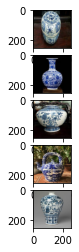

In [164]:
img = np.empty(5, dtype=object)

for i in range(5):
    file = "porcelain" + str(i+1) + ".jfif"
    img[i] = cv.imread(file)
    img[i] = cv.resize(img[i], (250, 250), interpolation = cv.INTER_AREA)


for i in range(5):
    img[i] = cv.cvtColor(img[i], cv.COLOR_BGR2RGB)
    plt.subplot(5, 1, i+1)
    plt.imshow(img[i])

In [165]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

<function matplotlib.pyplot.show(close=None, block=None)>

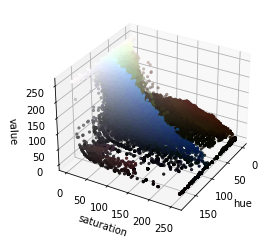

In [166]:
img_hsv = np.empty(5, dtype=object)

for i in range(5):
    img_hsv[i] = cv.cvtColor(img[i], cv.COLOR_RGB2HSV)

img_test = img[0]

h,s,v = cv.split(img_hsv[0])
flg = plt.figure()
axis = flg.add_subplot(1,1,1,projection = "3d")

pixel_colors = img[0].reshape((img_test.shape[0]*img_test.shape[1],3))
norm = colors.Normalize(vmin = 0, vmax = 1)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.flatten(),s.flatten(),v.flatten(),facecolor = pixel_colors,
            marker = ".")
axis.view_init(30,30)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show

 HSV color space: low:(90,50,40), high:(128,250,200)

In [167]:
from matplotlib.colors import hsv_to_rgb

<function matplotlib.pyplot.show(close=None, block=None)>

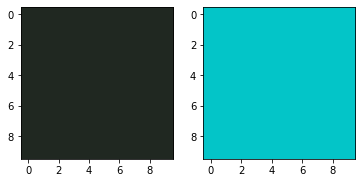

In [168]:
light_blue= (90, 50, 40)
dark_blue= (128, 250, 200)

square_light = np.full((10,10,3),light_blue,dtype= np.uint8)/255.0
square_dark = np.full((10,10,3),dark_blue,dtype= np.uint8)/255.0
plt.subplot(1,2,1)
plt.imshow(hsv_to_rgb(square_light))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(square_dark))
plt.show

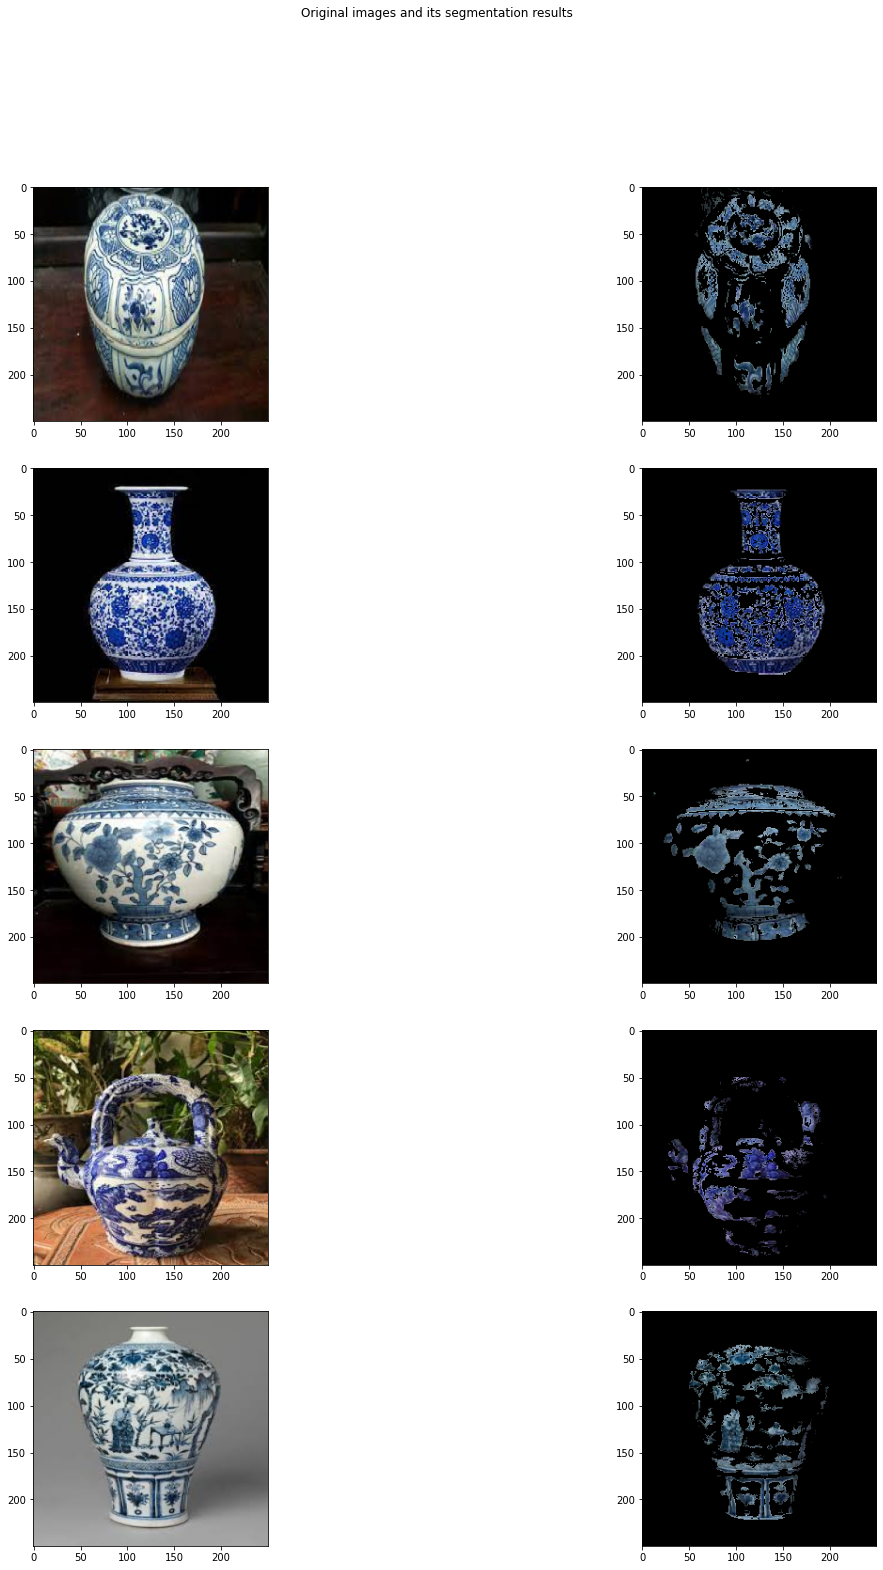

In [169]:
mask = np.empty(5, dtype=object)
res = np.empty(5, dtype=object)

f, ax = plt.subplots(5, 2, figsize = (20, 25))

for i in range(5):
    mask[i] = cv.inRange(img_hsv[i],light_blue,dark_blue)
    res[i] = cv.bitwise_and(img[i],img[i],mask=mask[i])
    ax[i][0].imshow(img[i])
    ax[i][1].imshow(res[i])

f.suptitle('Original images and its segmentation results')
plt.show()